# Como Funcionam as Redes Neurais

### Import

In [3]:
from fastbook import *

### Definindo função geral

In [15]:
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

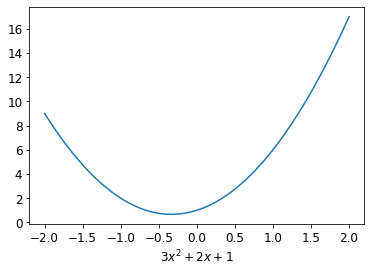

In [4]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [5]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [33]:
quad(3,2,1,1.5)

10.75

In [32]:
from functools import partial
def mk_quad(a,b,c): return partial(quad, a,b,c)

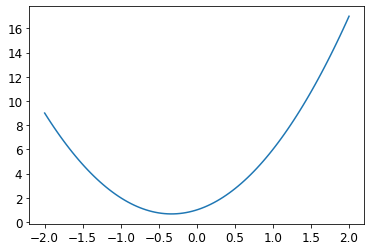

In [7]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [8]:
from numpy.random import normal, seed, uniform
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [9]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

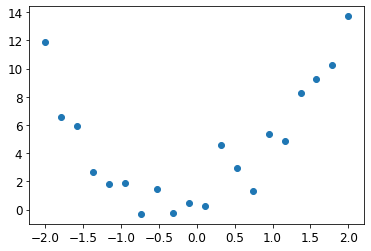

In [10]:
plt.scatter(x,y);

In [35]:
from ipywidgets import interact
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,12))

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [36]:
def mse(preds, acts): return ((preds-acts)**2).mean()

In [37]:
mk_quad(1.5,1.5,1.5)

functools.partial(<function quad at 0x000001E97EF511F8>, 1.5, 1.5, 1.5)

In [38]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mse(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MSE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [21]:
def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

In [50]:
quad_mse([1.5, 1.5, 1.5])

tensor(5.4892, dtype=torch.float64)

In [51]:
# rank 1 tensor
abc = torch.tensor([1.1,1.1,1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [52]:
loss = quad_mse(abc)
loss

tensor(10.1370, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [53]:
loss.backward()

In [54]:
abc.grad

tensor([-11.3866,  -0.1188,  -3.8409])

In [55]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mse(abc)
    
print(f'loss={loss:.2f}')

loss=8.76


### Otimizando - gradiente descendente

In [56]:
for i in range(5):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=8.76
step=1; loss=6.48
step=2; loss=4.11
step=3; loss=2.47
step=4; loss=2.14


# RELUs

In [59]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

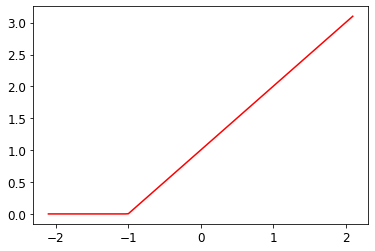

In [60]:
plot_function(partial(rectified_linear, 1,1))

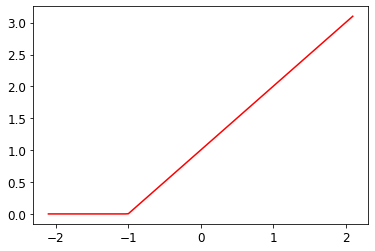

In [61]:
import torch.nn.functional as F
def rectified_linear2(m,b,x): return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,1))

In [62]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [63]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…